In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score

In [2]:
file_path = r"C:\Users\mipo\OneDrive - Hillyard, Inc\Desktop\GitHub\hillyard_routing_analysis\Resources\routing_analysis.csv"
data = pd.read_csv(file_path)

In [3]:
selected_columns = ['Latitude', 'Longitude']
X = data[selected_columns]
#, 'Total Orders', 'Total Deliveries', 'Avg. Revenue' - removed from range

In [4]:
X.fillna(0, inplace=True)

C:\Users\mipo\AppData\Local\Temp\ipykernel_19828\2534066105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [5]:
#determine the range of the amount of clusters to analyze
k_values = range(20,41)
ch_scores = []

for k in k_values:
    kmeans =  KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    ch_score = calinski_harabasz_score(X, labels)
    ch_scores.append(ch_score)

C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

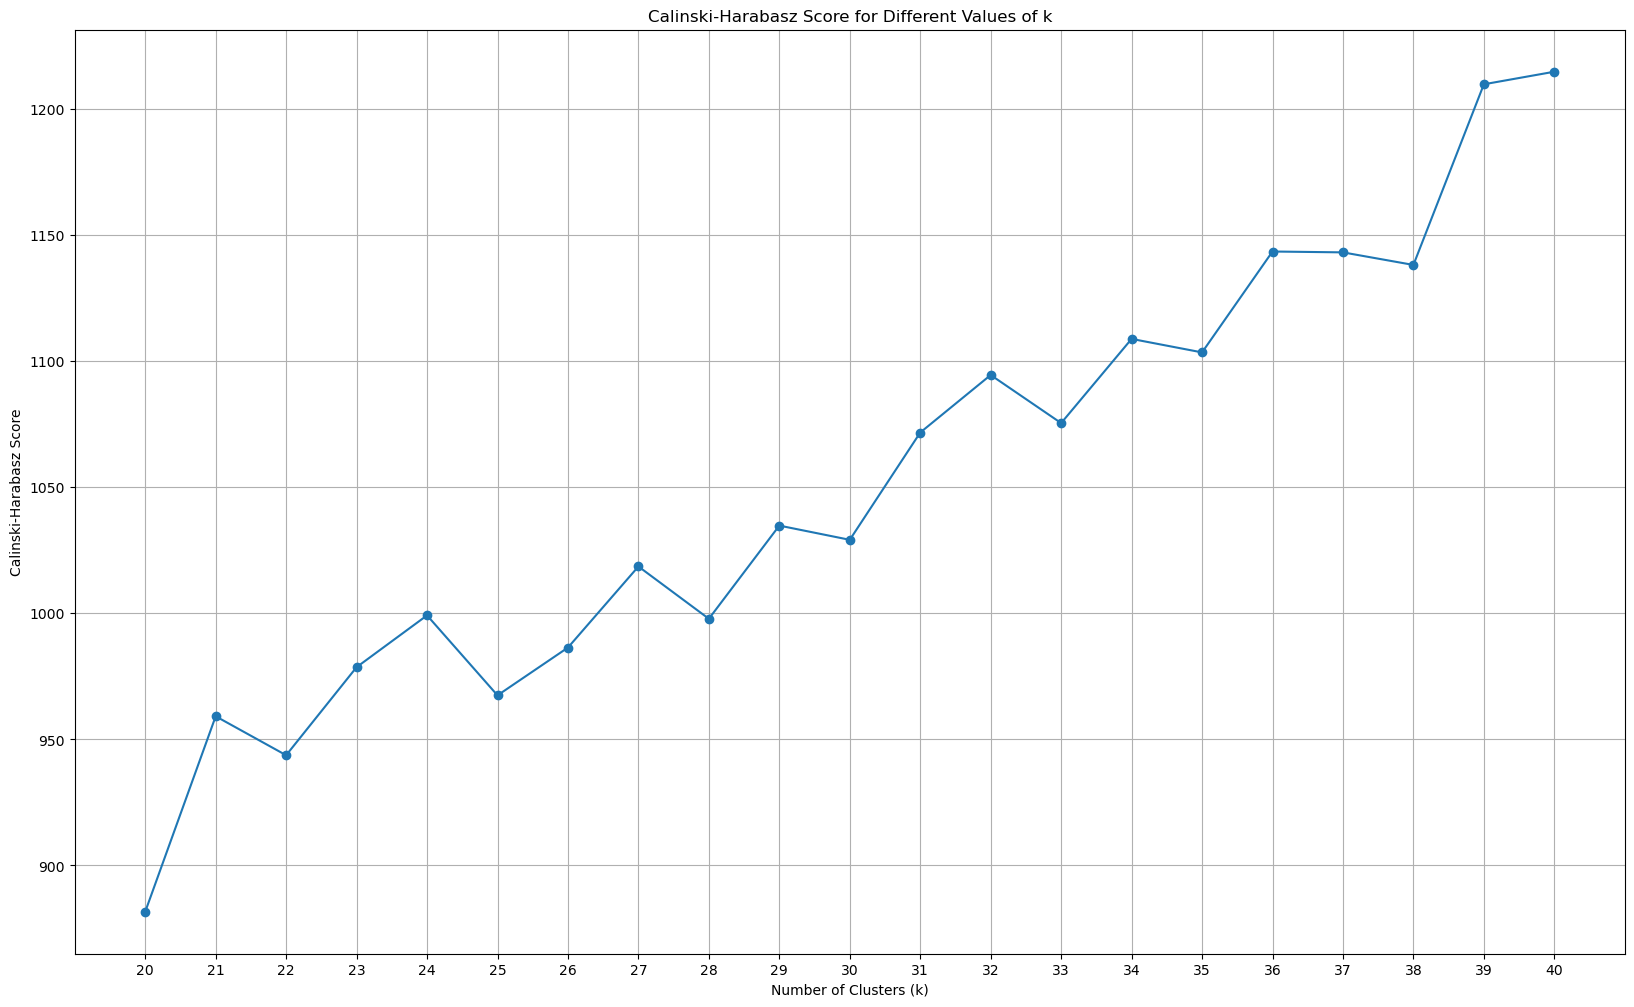

In [6]:
plt.figure(figsize=(20, 12))
plt.plot(k_values, ch_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score for Different Values of k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [7]:
k = k_values[np.argmax(ch_scores)]
k

40

In [8]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


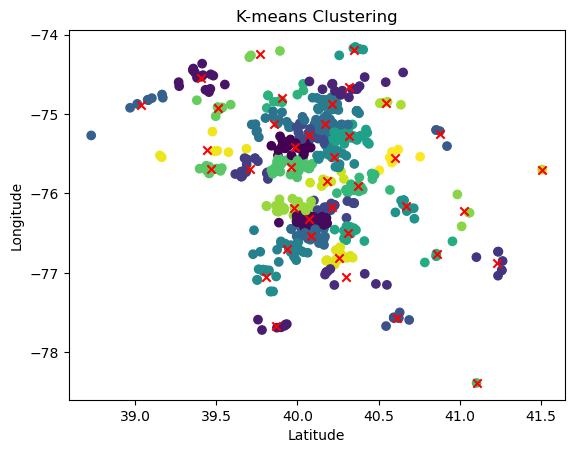

In [9]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.title('K-means Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [10]:
print("Cluster Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: Latitude = {centroid[0]}, Longitude = {centroid[1]}")

Cluster Centroids:
Cluster 1: Latitude = 39.981858592592594, Longitude = -75.40964077777778
Cluster 2: Latitude = 40.07394359482759, Longitude = -76.32488115517242
Cluster 3: Latitude = 39.40220276470588, Longitude = -74.544042
Cluster 4: Latitude = 39.86989442857143, Longitude = -77.665159
Cluster 5: Latitude = 40.3169025625, Longitude = -74.6579270625
Cluster 6: Latitude = 40.301562125, Longitude = -77.05095225
Cluster 7: Latitude = 41.22950342857143, Longitude = -76.87047657142857
Cluster 8: Latitude = 39.7065195625, Longitude = -75.6907356875
Cluster 9: Latitude = 40.210393296296296, Longitude = -76.17013003703704
Cluster 10: Latitude = 40.070648, Longitude = -75.25888609090909
Cluster 11: Latitude = 40.612239125, Longitude = -77.57477312500001
Cluster 12: Latitude = 40.878285500000004, Longitude = -75.25494525
Cluster 13: Latitude = 39.036499375, Longitude = -74.881577
Cluster 14: Latitude = 40.08466945714286, Longitude = -76.53078045714285
Cluster 15: Latitude = 40.16933544186047

In [11]:
cluster_centroids_df = pd.DataFrame(centroids, columns=X.columns)
cluster_centroids_df

,Latitude,Longitude
0,39.981859,-75.409641
1,40.073944,-76.324881
2,39.402203,-74.544042
3,39.869894,-77.665159
4,40.316903,-74.657927
5,40.301562,-77.050952
6,41.229503,-76.870477
7,39.706520,-75.690736
8,40.210393,-76.170130
9,40.070648,-75.258886


In [12]:
cluster_counts = pd.Series(labels).value_counts().sort_index()
cluster_centroids_df['Location Count'] = cluster_counts.values
cluster_centroids_df

,Latitude,Longitude,Location Count
0,39.981859,-75.409641,27
1,40.073944,-76.324881,116
2,39.402203,-74.544042,17
3,39.869894,-77.665159,7
4,40.316903,-74.657927,16
5,40.301562,-77.050952,8
6,41.229503,-76.870477,7
7,39.706520,-75.690736,16
8,40.210393,-76.170130,27
9,40.070648,-75.258886,22


In [13]:
data['Cluster'] = labels
data

,Account Manager,Sold To ID,Sold To Name,Ship To ID,Ship To ID.1,Ship To City,Street Address,State,Ship To Zip Code,Full Address,...,Total Deliveries,Avg. Deliveries,Avg. Lines,Avg. Revenue,Total Revenue,Avg. GP,Total GP,Quantity,Margin,Cluster
0,Robert Diller (0000142017),239004,WILLOW VALLEY MED LKS MNR FLR#,239004,WILLOW VALLEY MED LKS MNR FLR#,Willow Street,300 Willow Valley Lakes Dr,PA,17584,"300 Willow Valley Lakes Dr Willow Street, PA 1...",...,41,1.782609,4.086957,675.345652,15532.95,165.515652,3806.86,263.0,0.245083,33
1,Robert Diller (0000142017),239133,AGGREGATES EQUIPMENT#,239133,AGGREGATES EQUIPMENT#,Leola,9 Horseshoe Rd,PA,17540,"9 Horseshoe Rd Leola, PA 17540",...,7,1.166667,1.666667,310.223333,1861.34,114.120000,684.72,22.0,0.367864,33
2,Pete Annick (0000142010),239139,AKRON GRACE EC CHURCH,239139,AKRON GRACE EC CHURCH,AKRON,101 N 7th St,PA,17501,"101 N 7th St AKRON, PA 17501",...,7,1.000000,5.000000,509.685714,3567.80,217.741429,1524.19,85.0,0.427207,8
3,Matthew Morris (0000142013),239188,ANTIETAM SCHOOL DISTRICT,239188,ANTIETAM SCHOOL DISTRICT,Reading,201 N 25TH ST,PA,19606,"201 N 25TH ST Reading, PA 19606",...,27,1.588235,4.294118,1762.868235,29968.76,670.474706,11398.07,542.0,0.380332,26
4,Brad Miller (0000142022),239198,ARCHETYPE,239198,ARCHETYPE,Lancaster,317 N Market St,PA,17603,"317 N Market St Lancaster, PA 17603",...,7,1.166667,2.500000,199.108333,1194.65,74.256667,445.54,25.0,0.372946,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Brian Deiling (0000142018),239929,East Lycoming School District,483025,Hughesville JR/SR High School,Hughesville,349 Cemetery St,PA,17737,"349 Cemetery St Hughesville, PA 17737",...,36,1.500000,5.125000,2454.632500,58911.18,887.380000,21297.12,894.0,0.361512,6
710,Brian Deiling (0000142018),239929,East Lycoming School District,483026,Askar Elementary School,Hughesville,350 S Broad St,PA,17737,"350 S Broad St Hughesville, PA 17737",...,11,1.375000,6.125000,1513.150000,12105.20,547.622500,4380.98,335.0,0.361909,6
711,Brian Deiling (0000142018),272199,BYRON ENTERPRISES,483291,BYRON ENTERPRISES,Pottsville,2125 W Norwegian St,PA,17901,"2125 W Norwegian St Pottsville, PA 17901",...,8,1.000000,2.375000,223.756250,1790.05,90.208750,721.67,26.0,0.403156,20
712,Matthew Morris (0000142013),239963,ELITE SPORTSWEAR,483389,ELITE SPORTSWEAR,Reading,2525 N 12th St # 9-12,PA,19605,"2525 N 12th St # 9-12 Reading, PA 19605",...,21,1.909091,5.272727,518.694546,5705.64,171.493636,1886.43,328.0,0.330625,26


In [ ]:
cluster_centroids_df.to_csv("1430_cluster_centroids_40.csv", index=False)
data.to_csv("1430_custered_stops_lan.40", index=False)